In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


## Extração dos dados

In [2]:
data = pd.read_excel("Data/dataset.xls", sheet_name='Análise_ML')

In [3]:
data

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN
...,...,...,...,...
638,60,0.543772,revision,NaN
639,60,0.553846,revision,NaN
640,77,0.606065,revision,NaN
641,84,0.561842,revision,NaN


## Analise Exploratória - Item 1

### Dados ausentes

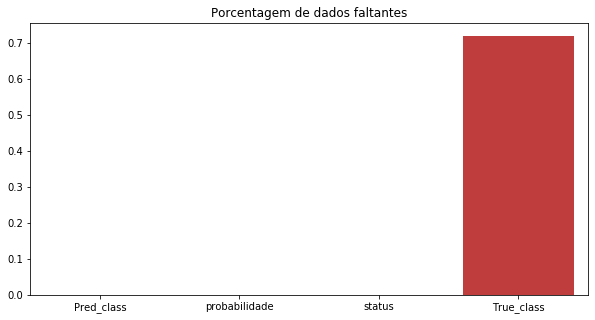

In [4]:
plt.figure(figsize=(10,5))
plt.title("Porcentagem de dados faltantes")
sns.barplot(x=data.isna().sum().keys(), y=data.isna().sum().values/len(data))

Mais de 70% da True_class não tem informação, ou seja, mais de 70% dos dados não tiveram a classificação de seu valor.

## Metricas de desempenho - Item 2

Para calcularmos as metricas precisamos de dados em que há a True_class, excluindo os com dados ausentes, pois as metricas são calculadas na forma f(true_class, predicted_class) -> $\mathbb{R}$

In [5]:
not_nan_data = data
not_nan_data['True_class'] = not_nan_data['True_class'].fillna(value=data['Pred_class']).reset_index(drop=True)
not_nan_data['True_class'] = not_nan_data['True_class'].astype(np.int)
data.isna().sum()

Pred_class       0
probabilidade    0
status           0
True_class       0
dtype: int64

### Acurácia

Podemos calcular manualmente:

In [6]:
predicted_class = data['Pred_class']
true_class = data['True_class']

acertos = 0
for index in range(len(true_class)):
    if int(true_class[index]) == int(predicted_class[index]):
        acertos += 1
print("Acuracia: ", acertos/len(not_nan_data))

Acuracia:  0.71850699844479


Ou usando a biblioteca do scikit-learn

In [7]:
print("Acuracia: ", accuracy_score(predicted_class, true_class))

Acuracia:  0.71850699844479


### F1-Score

In [8]:
print("F1-Score: ", f1_score(predicted_class, true_class, average='micro'))

F1-Score:  0.7185069984447899


In [9]:
print("F1-Score: ", f1_score(predicted_class, true_class, average='macro'))

F1-Score:  0.6351511049464889


In [10]:
print("F1-Score: ", f1_score(predicted_class, true_class, average='weighted'))

F1-Score:  0.733533262185557


### Recall

In [11]:

print("Recall: ", recall_score(predicted_class, true_class, average='micro'))

Recall:  0.71850699844479


In [12]:
print("Recall: ", recall_score(predicted_class, true_class, average='macro'))

Recall:  0.6286648904994168


/home/andresacilotti/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print("Recall: ", recall_score(predicted_class, true_class, average='weighted'))

Recall:  0.71850699844479


### Precision

In [14]:
print("Precision: ", precision_score(predicted_class, true_class, average='micro'))

Recall:  0.71850699844479


In [15]:
print("Precision: ", precision_score(predicted_class, true_class, average='macro'))

Precision:  0.6997739858971228


/home/andresacilotti/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print("Precision: ", precision_score(predicted_class, true_class, average='weighted'))

Precision:  0.7961207918184912


In [ ]:
##